In [58]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

t, r, k, a1, a2, m12,  = symbols("t, r, k, a1, a2, m12")
x = Function("x")
y = Function("y")

#Differential Equation 01, including:
# r = positive growth rate
# k1, k2 = Carrying Capacity
# a1 = percentage decrease due to human induced Allee Effects in patch 1
# a2 = percentage decrease due to environmental Allee Effects in patch 2
# m12, m21 = Migration from Patch 1 to 2 and 2 to 1 respectively

Patch_1 = Eq(diff(x(t), t), r * ((x(t)/a1) - 1) * ((1 - (x(t)/k)) * x(t)) - (m12 * x(t)) + (m21 * y(t)))

Patch_2 = Eq(diff(y(t), t), r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) + (m12 * x(t)) - (m21 * y(t)))


solution= dsolve([Patch_1, Patch_2], [x(t), y(t)])
display(solution)



[Eq(x(t), Piecewise((C1*Piecewise((-m12/2 + m21/2 + sqrt(4*m12*m21 + (-m12 + m21)**2)/2, Eq(m21, 0) & Eq(m12 + r, m12/2 + m21/2 + r - sqrt(4*m12*m21 + (-m12 + m21)**2)/2)), (m21, True))*exp(t*(-m12/2 - m21/2 - r + sqrt(4*m12*m21 + (-m12 + m21)**2)/2)) + C2*Piecewise((-m12/2 + m21/2 - sqrt(4*m12*m21 + (-m12 + m21)**2)/2, Eq(m21, 0) & Eq(m12 + r, m12/2 + m21/2 + r + sqrt(4*m12*m21 + (-m12 + m21)**2)/2)), (m21, True))*exp(t*(-m12/2 - m21/2 - r - sqrt(4*m12*m21 + (-m12 + m21)**2)/2)), Ne(m12**2 + 2*m12*m21 + m21**2, 0)), (C1*exp(t*(-m12/2 - m21/2 - r + sqrt(4*m12*m21 + (-m12 + m21)**2)/2)), Eq(m12, 0) & Eq(m21, 0) & Eq(m12 + r, m21 + r)), ((C1*Piecewise((-m12/2 + m21/2 + sqrt(4*m12*m21 + (-m12 + m21)**2)/2, Eq(m21, 0) & Eq(m12 + r, m12/2 + m21/2 + r - sqrt(4*m12*m21 + (-m12 + m21)**2)/2)), (m21, True)) + C2*(t*Piecewise((-m12/2 + m21/2 + sqrt(4*m12*m21 + (-m12 + m21)**2)/2, Eq(m21, 0) & Eq(m12 + r, m12/2 + m21/2 + r - sqrt(4*m12*m21 + (-m12 + m21)**2)/2)), (m21, True)) + Piecewise((1, Eq(m

In [59]:
#Two Patch Coupled System of ODEs
DS1 = r * ((x(t)/a1) - 1) * (1 - (x(t)/k)) * x(t) - m12 * x(t) 
DS2 = r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) + m12 * x(t) 

#Finding the Equilibrium Values
Equilibrium= nonlinsolve([DS1,DS2], [x(t), y(t)])
display(Equilibrium)

eq_list = list(Equilibrium)
print(eq_list)

FiniteSet((0, 0), (0, a2), (0, k))

[(0, 0), (0, a2), (0, k)]


In [60]:
#Finding the Jacobian 
Jacobian = Matrix(
    [
    [diff(DS1, x(t)), diff(DS1, y(t))], 
    [diff(DS2, x(t)), diff(DS2, y(t))]
    ])
Jacobian


Matrix([
[-m12 + r*(-1 + x(t)/a1)*(1 - x(t)/k) - r*(-1 + x(t)/a1)*x(t)/k + r*(1 - x(t)/k)*x(t)/a1,                                                                                0],
[                                                                                    m12, r*(-1 + y(t)/a2)*(1 - y(t)/k) - r*(-1 + y(t)/a2)*y(t)/k + r*(1 - y(t)/k)*y(t)/a2]])

In [61]:
#Jacobian matrix with (0,0) substituted in
Jac_1 = simplify(Jacobian.subs({x(t) : eq_list[0][0], y(t) : eq_list[0][1]}))
Jac_1

Matrix([
[-m12 - r,  0],
[     m12, -r]])

In [62]:
#Caculating the Jacobian for each of the equilibrium values. 
for i in eq_list: 
    Jac = simplify(Jacobian.subs({x(t) : i[0], y(t) : i[1]}))
    display(Jac)
    

Matrix([
[-m12 - r,  0],
[     m12, -r]])

Matrix([
[-m12 - r,           0],
[     m12, -a2*r/k + r]])

Matrix([
[-m12 - r,             0],
[     m12, r*(a2 - k)/a2]])

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

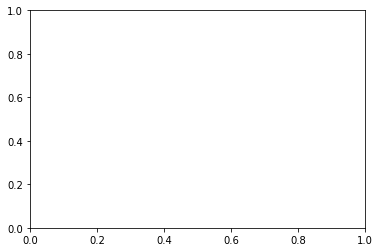

In [66]:
#Creating the Phase Plane Plots,

from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np
nx, ny = 1, 1  #increments
x = np.arange(0, 30, nx) #domain
y = np.arange(0, 30, ny) #range
X, Y = np.meshgrid(x, y)

dx = r * ((x/a1) - 1) * ((1 - (x/k)) * x) - (m12 * x)
dy = r * ((y/a2) - 1) * ((1 - (y/k)) * y) - (m12 * y) 

plot2 = plt.figure()
plt.quiver(X, Y, dx, dy, color='blue', headlength=2)

plt.title('Phase Plane Portrait of Invasion Model')
plt.ylabel('n2(t)')
plt.xlabel('n1(t)')
plt.show(plot2)